In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow==2.10.0 tensorflow-io==0.27.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.10.0 (from versions: none)
ERROR: No matching distribution found for tensorflow==2.10.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
np.random.seed(0)
# from sklearn.metrics import precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import confusion_matrix

In [4]:
data = pd.read_csv("../input/android-malware-dataset-for-machine-learning/drebin-215-dataset-5560malware-9476-benign.csv")
print("Total missing values : ",sum(list(data.isna().sum())))
data

Total missing values :  0


/tmp/ipykernel_33/1477861248.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../input/android-malware-dataset-for-machine-learning/drebin-215-dataset-5560malware-9476-benign.csv")


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


In [5]:
classes,count = np.unique(data['class'],return_counts=True)
#Perform Label Encoding
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)
data = data.replace(classes,lbl_enc.fit_transform(classes))

#Dataset contains special characters like ''?' and 'S'. Set them to NaN and use dropna() to remove them
data=data.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(data.isna().sum())))
data.dropna(inplace=True)
for c in data.columns:
    data[c] = pd.to_numeric(data[c])
data

[0 1] ['B' 'S']
Total missing values :  5


/tmp/ipykernel_33/410007786.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(classes,lbl_enc.fit_transform(classes))


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


In [6]:
print("Total Features : ",len(data.columns)-1)

Total Features :  215


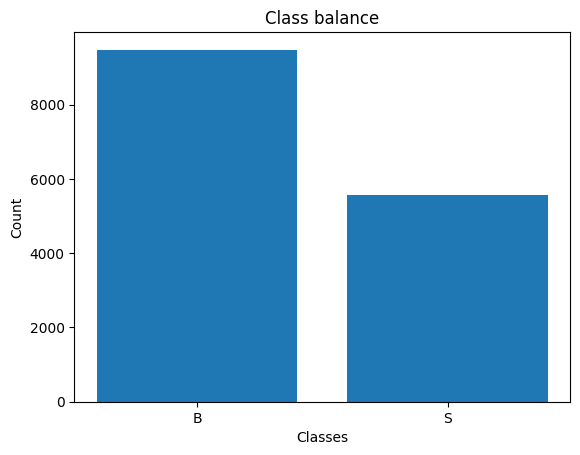

In [7]:
plt.bar(classes,count)
plt.title("Class balance")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [8]:
from sklearn.utils import resample
# Separate features and labels
X = data.drop("class", axis=1)
y = data["class"]

# Count the occurrences of each class
class_counts = y.value_counts()

# Calculate the majority and minority class labels
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

# Separate majority and minority class samples
majority_samples = data[data["class"] == majority_class]
minority_samples = data[data["class"] == minority_class]

# Oversample the minority class to match the majority class
minority_oversampled = resample(minority_samples,                                 replace=True,      # Sample with replacement
                                 n_samples=len(majority_samples),  # Match majority class
                                 random_state=0)    # Set random seed for reproducibility

# Combine the oversampled minority class with the majority class
balanced_data = pd.concat([majority_samples, minority_oversampled])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=0)
# Now, balanced_data contains the balanced dataset with equal instances of both classes

In [9]:
# Count the occurrences of each class in the balanced dataset
balanced_class_counts = balanced_data["class"].value_counts()

# Print the class counts
print(balanced_class_counts)

class
1    9476
0    9476
Name: count, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split 
train_x,test_x,train_y,test_y = train_test_split(data[data.columns[:len(data.columns)-1]].to_numpy(),
                                                 data[data.columns[-1]].to_numpy(),
                                                  test_size = 0.2,
                                                  shuffle=True)

In [11]:
print("Train features size : ",len(train_x))
print("Train labels size : ",len(train_y))
print("Test features size : ",len(test_x))
print("Test features size : ",len(test_y))

Train features size :  12024
Train labels size :  12024
Test features size :  3007
Test features size :  3007


In [12]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (12024, 215)
Train labels :  (12024,)
Test Features :  (3007, 215)
Test labels :  (3007,)


In [13]:
train_y = train_y.reshape((-1,1))
test_y = test_y.reshape((-1,1))

In [14]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (12024, 215)
Train labels :  (12024, 1)
Test Features :  (3007, 215)
Test labels :  (3007, 1)


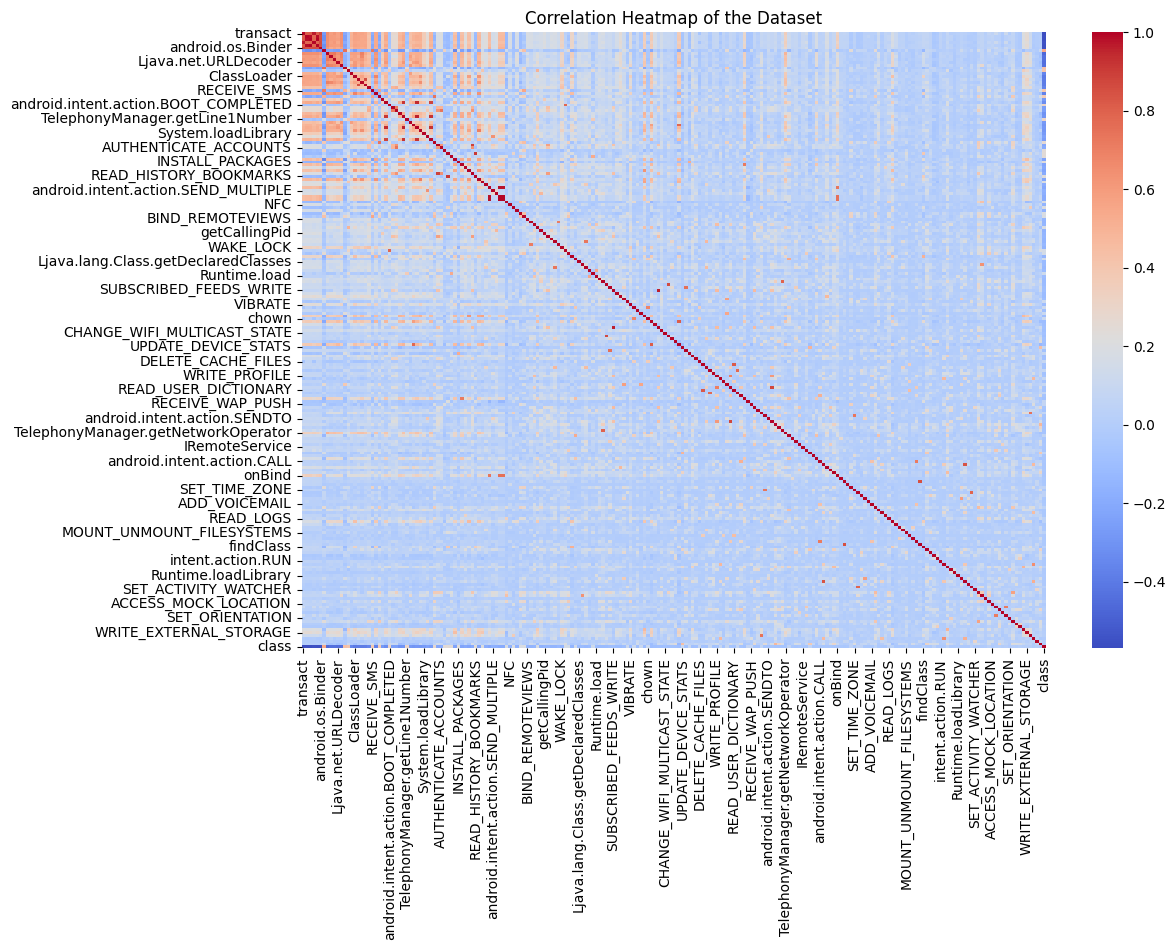

In [16]:
import seaborn as sns
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of the Dataset")
plt.show()


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

2024-05-29 18:01:23.956718: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 18:01:23.956891: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 18:01:24.111925: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [18]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [19]:
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=input_shape))
    model.add(GRU(50, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [47]:
time_steps = 1
X_train_reshaped = train_x.reshape(train_x.shape[0], time_steps, train_x.shape[1])
X_test_reshaped = test_x.reshape(test_x.shape[0], time_steps, test_x.shape[1])

In [28]:
X_train_reshaped.shape

(12024, 1, 215)

In [35]:
input_shape = (X_train_reshaped.shape[1], X_train_reshaped .shape[2])

In [38]:
lstm_model = create_lstm_model(input_shape)
lstm_model.fit(X_train_reshaped, train_y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1148
Epoch 2/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0271
Epoch 3/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0201
Epoch 4/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0158
Epoch 5/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0136
Epoch 6/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0111
Epoch 7/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0101
Epoch 8/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0087
Epoch 9/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0071
Epoch 10/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0068
Epoch 11/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0055
Epoch 12/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0054
Epoch 13/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0047
Epoch 14/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0043
Epoch 15/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1

In [42]:
gru_model = create_gru_model(input_shape)
gru_model.fit(X_train_reshaped, train_y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0723
Epoch 2/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0272
Epoch 3/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0218
Epoch 4/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0176
Epoch 5/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0142
Epoch 6/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0126
Epoch 7/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0119
Epoch 8/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0098
Epoch 9/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0080
Epoch 10/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0075
Epoch 11/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0068
Epoch 12/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0066
Epoch 13/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0055
Epoch 14/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0054
Epoch 15/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3

In [48]:
# Evaluate LSTM model
lstm_loss = lstm_model.evaluate(X_test_reshaped, test_y, verbose=1)
print(f'LSTM Loss: {lstm_loss}')

# Evaluate GRU model
gru_loss = gru_model.evaluate(X_test_reshaped, test_y, verbose=1)
print(f'GRU Loss: {gru_loss}')


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044
LSTM Loss: 0.004967666231095791
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0060 
GRU Loss: 0.005537322256714106


In [49]:
lstm_predictions = lstm_model.predict(X_test_reshaped)
gru_predictions = gru_model.predict(X_test_reshaped)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


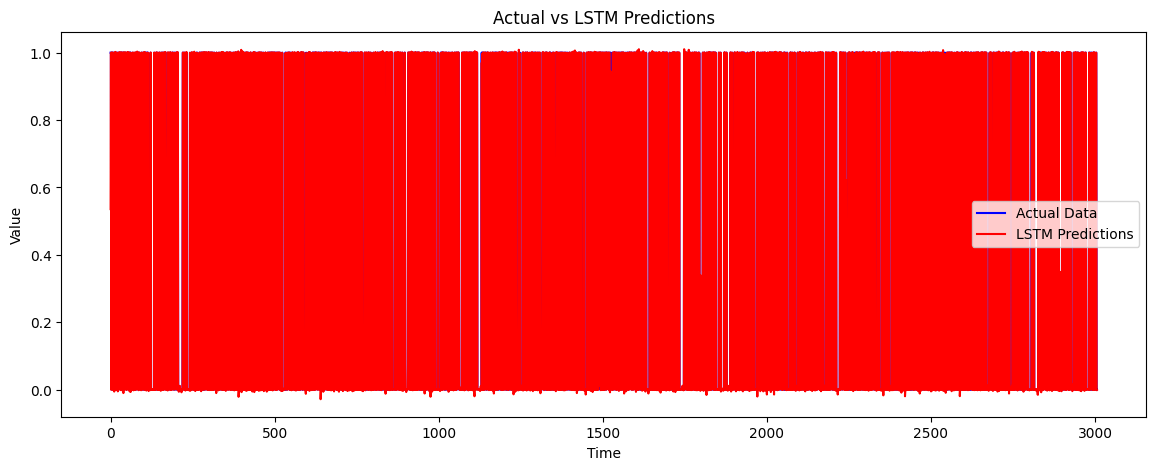

In [55]:
plt.figure(figsize=(14, 5))
plt.plot(test_y, color='blue', label='Actual Data')
plt.plot(lstm_predictions, color='red', label='LSTM Predictions')
plt.title('Actual vs LSTM Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

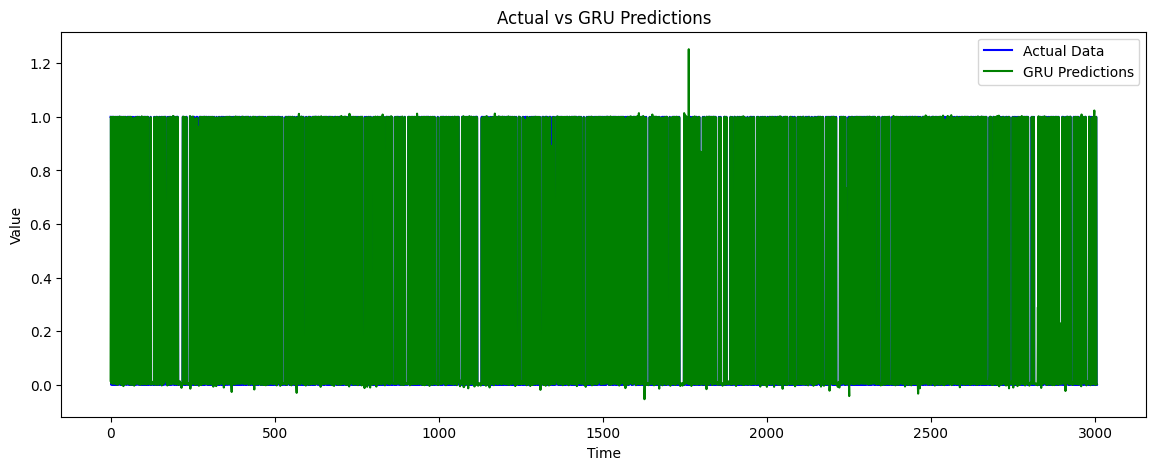

In [57]:
plt.figure(figsize=(14, 5))
plt.plot(test_y, color='blue', label='Actual Data')
plt.plot(gru_predictions, color='green', label='GRU Predictions')
plt.title('Actual vs GRU Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [69]:
from sklearn.metrics import precision_score, recall_score

# Define threshold (you can adjust this threshold as needed)
threshold = 0.5

# Convert predictions to binary labels
lstm_binary_predictions = (lstm_predictions > threshold).astype(int)
lstm_binary_y_test = (test_y > threshold).astype(int)

# Calculate precision and recall
precision = precision_score(lstm_binary_y_test, lstm_binary_predictions)
recall = recall_score(lstm_binary_y_test, lstm_binary_predictions)

print(f'LSTM_Precision: {precision}')
print(f'LSTM_Recall: {recall}')

LSTM_Precision: 0.9879740980573543
LSTM_Recall: 0.9916434540389972


In [67]:
from sklearn.metrics import f1_score

# Calculate weighted F1 score
weighted_f1 = f1_score(lstm_binary_y_test, lstm_binary_predictions, average='weighted')

print(f'Weighted F1 Score: {weighted_f1}')

Weighted F1 Score: 0.9926867237981123


In [74]:
from sklearn.metrics import precision_score, recall_score

# Define threshold (you can adjust this threshold as needed)
threshold = 0.5

# Convert predictions to binary labels
gru_binary_predictions = (gru_predictions > threshold).astype(int)
gru_binary_y_test = (test_y > threshold).astype(int)

# Calculate precision and recall
precision = precision_score(gru_binary_y_test, gru_binary_predictions)
recall = recall_score(gru_binary_y_test, gru_binary_predictions)

print(f'GRU_Precision: {precision}')
print(f'GRU_Recall: {recall}')

GRU_Precision: 0.987072945521699
GRU_Recall: 0.9925719591457753


In [75]:
weighted_f1 = f1_score(gru_binary_y_test, gru_binary_predictions, average='weighted')

print(f'Weighted F1 Score: {weighted_f1}')

Weighted F1 Score: 0.9926882043534047


In [72]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(lstm_binary_y_test, lstm_binary_predictions)

# Print confusion matrix
print("LSTM Confusion Matrix:")
print(cm)

LSTM Confusion Matrix:
[[1917   13]
 [   9 1068]]


In [73]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(gru_binary_y_test, gru_binary_predictions)

# Print confusion matrix
print("GRU Confusion Matrix:")
print(cm)

GRU Confusion Matrix:
[[1917   13]
 [   9 1068]]
